# NEPSE Data Analysis Overview

**1.Data Import & Initial Exploration**

i. Imported libraries: numpy, pandas, seaborn, matplotlib.

ii. Loaded dataset: nepse.csv with 5756 rows × 9 columns.

iii. Columns: SN, open, high, low, close, change, pct_change, turnover, date.

iv. Initial checks (df.head(), df.info(), df.describe()):

v. Several columns stored as object due to commas in numeric values.


**2. Data Cleaning & Transformation**

i. Outlier detection using boxplots for numerical variables.

ii. Created new feature:

Volatility = high – low (captures intraday price spread).

3. Exploratory Data Analysis (EDA)
Descriptive Statistics:

i. Prices (open, high, low, close) show wide fluctuations across trading days.

ii. Turnover varies significantly, indicating different levels of market activity.

A. Histograms/Density Plots:

Closing prices distribution shows clustering around certain ranges.

B. Pairplots:

Strong linear relationships among open, high, low, close.

change shows weaker relationships, confirming independence from absolute price levels.

C. Correlation Heatmap:

open, high, low, close → highly correlated (close to 1).

change vs. price levels → near 0 correlation.

Volatility provides distinct information not captured by raw prices.


**Key Results & Findings**

High Redundancy Among Price Variables

Strong correlations between open, high, low, and close.

Volatility as a Distinct Feature

Captures intraday spread and provides unique insights into market risk.

Change & pct_change Independence

Weak correlation with absolute price levels → better predictors of market movement.

Turnover Patterns

High turnover often aligns with high volatility → signals active trading days.

Market Moves as a Block

NEPSE price levels move together, showing systemic trends rather than isolated fluctuations.

Importing all the required liabiries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('nepse.csv')
df

,SN,open,high,low,close,change,pct_change,turnover,date
0,1,"2,046.62","2,046.62","2,013.75","2,017.46",-27.26,-1.33,"1,443,432,770.47",2022-07-22
1,2,"2,052.95","2,065.86","2,038.58","2,044.72",-5.87,-0.29,"1,642,648,586.50",2022-07-21
2,3,"2,046.21","2,061.31","2,033.46","2,050.59",4.89,0.24,"1,731,832,270.04",2022-07-20
3,4,"2,029.71","2,062.07","2,029.29","2,045.70",16.27,0.80,"2,299,316,326.28",2022-07-19
4,5,"2,011.71","2,029.43","2,000.19","2,029.43",18.03,0.90,"1,312,962,959.61",2022-07-18
...,...,...,...,...,...,...,...,...,...
5751,5752,172.66,172.66,172.66,172.66,0.00,0.00,0.00,1997-07-24
5752,5753,172.68,173.03,173.03,173.03,0.00,0.00,0.00,1997-07-23
5753,5754,173.03,173.03,173.03,173.03,0.00,0.00,0.00,1997-07-22
5754,5755,173.25,173.25,173.25,173.25,0.00,0.00,0.00,1997-07-21


In [3]:
df.shape

(5756, 9)

1. Examining the dataset

In [4]:
df.head()

,SN,open,high,low,close,change,pct_change,turnover,date
0,1,"2,046.62","2,046.62","2,013.75","2,017.46",-27.26,-1.33,"1,443,432,770.47",2022-07-22
1,2,"2,052.95","2,065.86","2,038.58","2,044.72",-5.87,-0.29,"1,642,648,586.50",2022-07-21
2,3,"2,046.21","2,061.31","2,033.46","2,050.59",4.89,0.24,"1,731,832,270.04",2022-07-20
3,4,"2,029.71","2,062.07","2,029.29","2,045.70",16.27,0.80,"2,299,316,326.28",2022-07-19
4,5,"2,011.71","2,029.43","2,000.19","2,029.43",18.03,0.90,"1,312,962,959.61",2022-07-18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SN          5756 non-null   int64  
 1   open        5756 non-null   object 
 2   high        5756 non-null   object 
 3   low         5756 non-null   object 
 4   close       5756 non-null   object 
 5   change      5756 non-null   float64
 6   pct_change  5756 non-null   float64
 7   turnover    5756 non-null   object 
 8   date        5756 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 404.8+ KB


1.2 Stastical View of a Dataset

In [6]:
df.describe()

,SN,change,pct_change
count,5756.000000,5756.000000,5756.000000
mean,2878.065671,0.299745,0.035549
std,1662.314543,14.153410,0.921718
min,1.000000,-123.340000,-6.040000
25%,1439.750000,0.000000,0.000000
50%,2878.500000,0.000000,0.000000
75%,4317.250000,0.000000,0.000000
max,5756.000000,161.940000,6.060000


In [7]:
df.describe(include ='object')
#obj datatype = mixed datatypes

,open,high,low,close,turnover,date
count,5756,5756,5756,5756,5756,5756
unique,4934,4952,4942,4946,1361,5696
top,312.00,312.00,312.00,331.00,0.00,2019-04-29
freq,10,10,10,10,4336,2


Insights & Findings

. There are lots of repeating values in the dataset.

. We can see the great flauctuation of nepse index from the adove.

o	Identifing potential problems such as missing values or inconsistent data.

In [8]:
df.isnull()

,SN,open,high,low,close,change,pct_change,turnover,date
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
5751,False,False,False,False,False,False,False,False,False
5752,False,False,False,False,False,False,False,False,False
5753,False,False,False,False,False,False,False,False,False
5754,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

,0
SN,0
open,0
high,0
low,0
close,0
change,0
pct_change,0
turnover,0
date,0


Insights :

. There are no missing values.

# 2. Data Cleaning and Transformation

o	Addressing missing data using appropriate methods (e.g., mean/median imputation, removal).

Since, there is no missing values in the df. So data imputation and dropna is not used.

o	Use statistical methods or visualizations (e.g., box plots) to detect and handle outliers.

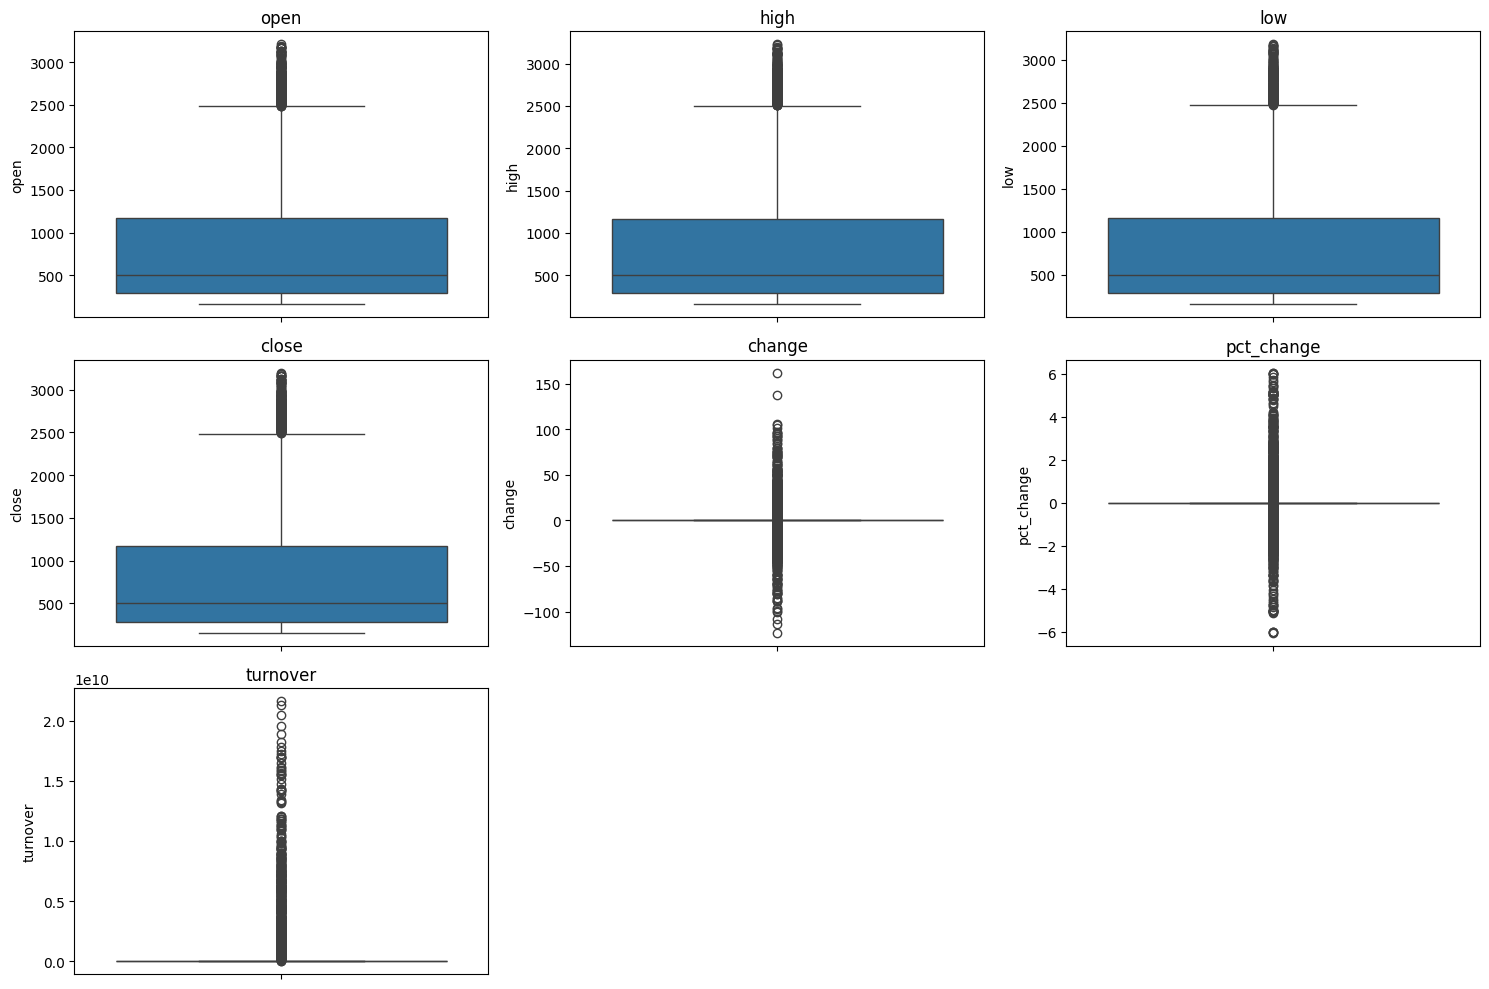

In [10]:
numerical_cols = ['open', 'high', 'low', 'close', 'change', 'pct_change', 'turnover']

# Convert numerical columns to numeric, handling errors
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col].replace(',', '', regex=True), errors='coerce')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Insights and findings :**

*. Presence of Outliers*

Most numerical variables (open, high, low, close, turnover) have outliers and show several extreme values outside the whiskers.

These outliers likely represent days of unusually high or low trading activity, possibly linked to market shocks or special events.

o	Creating new features based on domain knowledge to enrich the dataset.

In [11]:
df.columns

Index(['SN', 'open', 'high', 'low', 'close', 'change', 'pct_change',
       'turnover', 'date'],
      dtype='object')

In [12]:
#volatility = difference between high and lows

df['volatility'] = df['high'] - df['low']
df['volatility']

,volatility
0,32.87
1,27.28
2,27.85
3,32.78
4,29.24
...,...
5751,0.00
5752,0.00
5753,0.00
5754,0.00


# 3. Exploratory Data Analysis (EDA)

o	Computing summary statistics for numerical and categorical variables.

🧠 What Are Categorical Variables?

Categorical variables are features in a dataset that represent categories or groups rather than numerical values. They describe qualities or characteristics that can be divided into distinct groups.

In [13]:
df.describe()

,SN,open,high,low,close,change,pct_change,turnover,volatility
count,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,5.756000e+03,5756.000000
mean,2878.065671,780.855120,784.071942,776.913426,780.276908,0.299745,0.035549,5.725358e+08,7.158516
std,1662.314543,663.505157,669.138413,655.841965,661.984535,14.153410,0.921718,1.930734e+09,17.130599
min,1.000000,156.430000,156.430000,156.430000,156.430000,-123.340000,-6.040000,0.000000e+00,-6.050000
25%,1439.750000,287.380000,287.380000,287.380000,287.380000,0.000000,0.000000,0.000000e+00,0.000000
50%,2878.500000,502.375000,502.375000,502.375000,502.375000,0.000000,0.000000,0.000000e+00,0.000000
75%,4317.250000,1166.725000,1171.067500,1161.952500,1167.237500,0.000000,0.000000,0.000000e+00,0.000000
max,5756.000000,3208.530000,3226.890000,3178.580000,3198.600000,161.940000,6.060000,2.164760e+10,175.790000


In [14]:
df.describe(include ='object')

,date
count,5756
unique,5696
top,2019-04-29
freq,2


.	Ploting data distributions (e.g., histograms, density plots).

In [15]:
df.columns

Index(['SN', 'open', 'high', 'low', 'close', 'change', 'pct_change',
       'turnover', 'date', 'volatility'],
      dtype='object')

Histogram with density plots

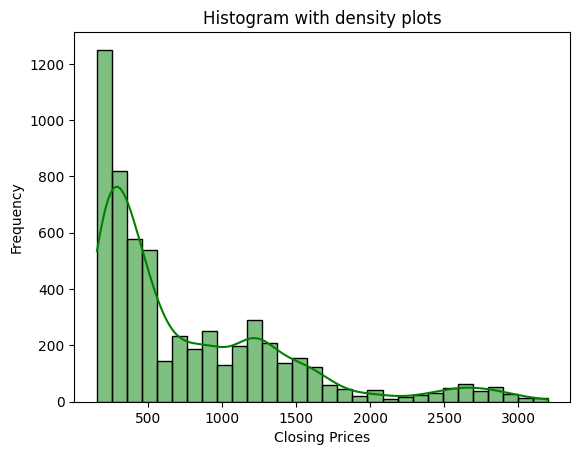

In [16]:
sns.histplot(df['close'], bins = 30, kde = True, color = 'green')
plt.title('Histogram with density plots')
plt.xlabel('Closing Prices')
plt.ylabel('Frequency')
plt.show()

**Insights & Findings**

. The frequency is very high when the nepse closing price is <= 500

.The frequency is very low when the nepse closing price is >= 2500.

. This means the nepse has oscillate more in below than 500 to 1500 then other higher prices.

.	Explore relationships between variables (e.g., scatter plots, pair plots).

Examining the relationship between variables using pairplots

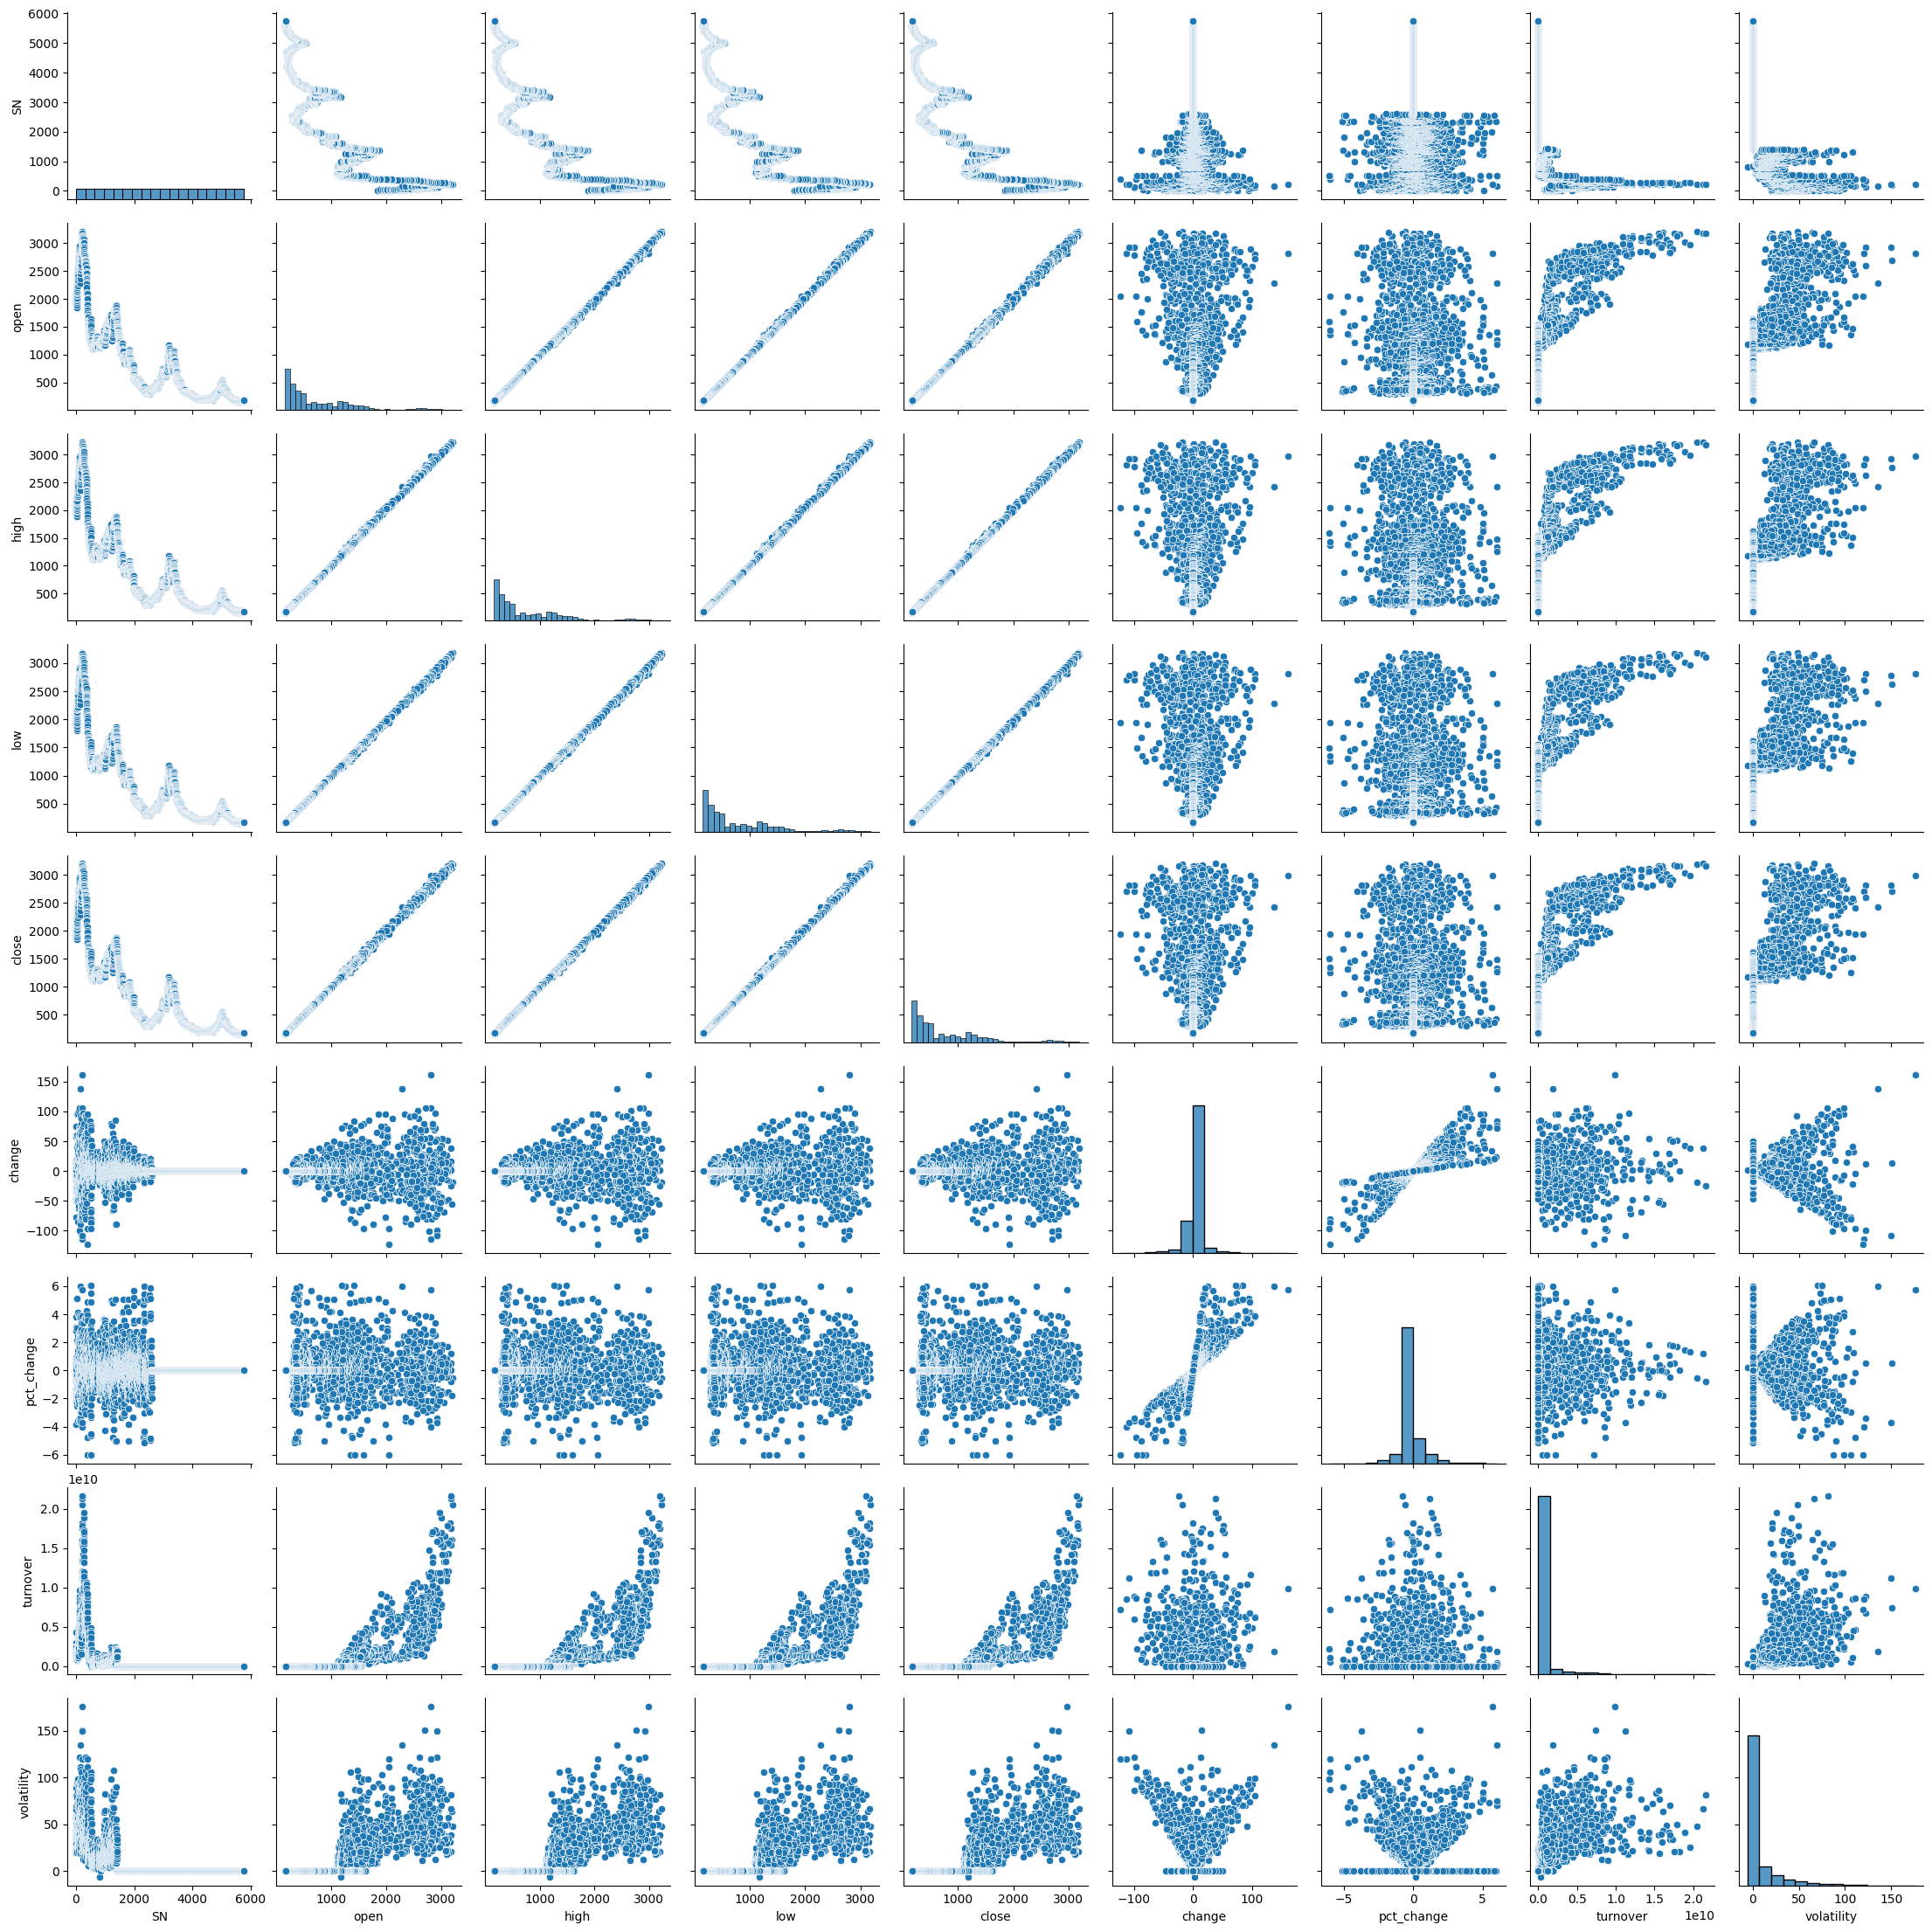

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
df.columns

Index(['SN', 'open', 'high', 'low', 'close', 'change', 'pct_change',
       'turnover', 'date', 'volatility'],
      dtype='object')

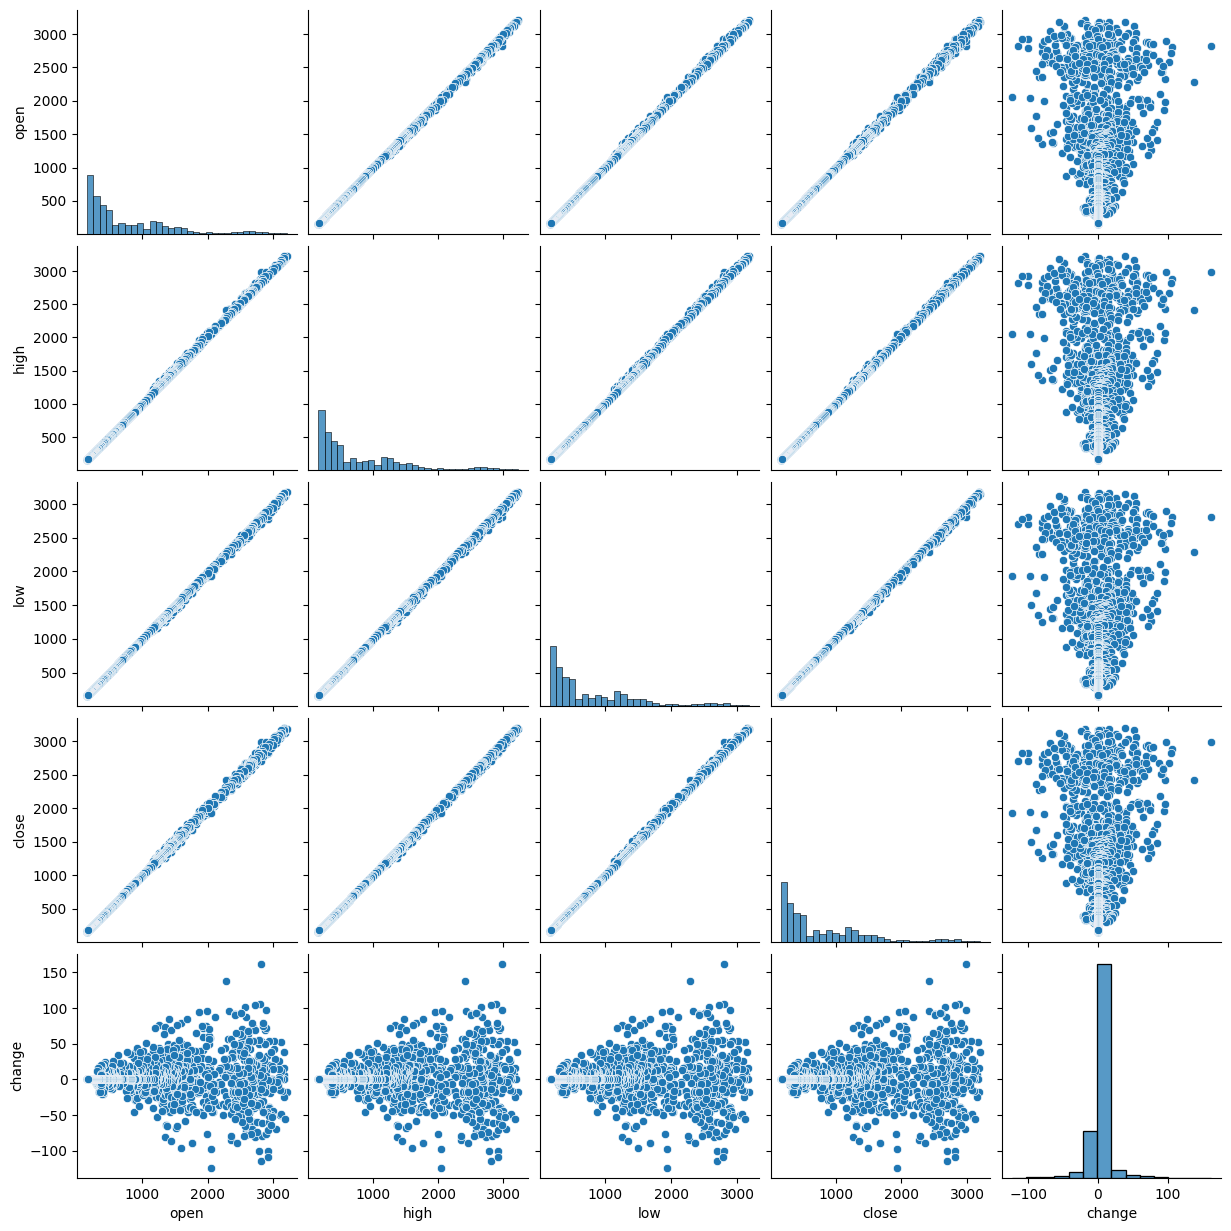

In [19]:
selected_coln = df[['open','high','low','close','change']]
sns.pairplot(selected_coln)
plt.show()

	Analyzing correlations (e.g., heatmaps, correlation matrices).

In [20]:
df.dtypes

,0
SN,int64
open,float64
high,float64
low,float64
close,float64
change,float64
pct_change,float64
turnover,float64
date,object
volatility,float64


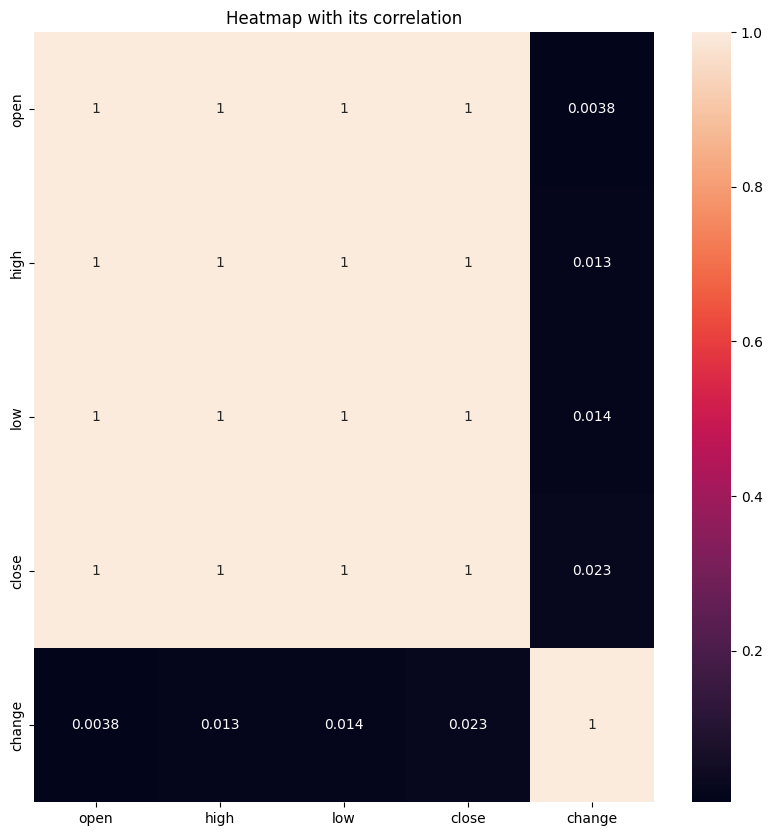

In [21]:
#Heatmap with correlation matrices

correlation_matrix = df[['open','high','low','close','change']].corr()
plt.figure(figsize= (10,10))
plt.title('Heatmap with its correlation')
sns.heatmap(correlation_matrix, annot = True)
plt.show()


Insights and Results:

.open, high, low, and close prices are all highly correlated (close to 1)

.There is almost 0 correlation between change vs open,high,low and close. We can see that clearly in the adove heatmap.